'pip' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 

from sklearn.metrics import mean_squared_error , r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression ,Ridge , Lasso
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV


In [3]:
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [4]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
x = df.drop (columns=['math score'],axis=1)

In [7]:
y = df['math score']

In [8]:
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [9]:
num_f = x.select_dtypes(exclude="object").columns
cat_f = x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder ,StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer ,cat_f),
        ("StandardScaler",num_transformer,num_f)
    ]
)

In [10]:
X = preprocessor.fit_transform(x)

In [11]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

In [12]:
from sklearn.model_selection import train_test_split
x_train , x_test ,y_train ,y_test =train_test_split(X,y,test_size=0.2,random_state=42)
x_train.shape , x_test.shape

((800, 19), (200, 19))

In [23]:

def evaluate_model(true,prediction):
    mae = mean_absolute_error(true,prediction)
    mse = mean_squared_error(true,prediction)
    rmse = np.sqrt(mean_squared_error(true,prediction))
    r2_square= r2_score(true,prediction)
    return mae ,mse ,r2_score(true,prediction)

In [24]:
models = {
    "LinearRegression": LinearRegression(),
    "lasso" :Lasso(),
    "Ridge": Ridge(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

model_list=[]
r2_List = []

for i in range(len(list(models))):
    #Train model
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    #Make Prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    mtmae ,  mtrmse , mtr2 = evaluate_model(y_train, y_train_pred)
    mttmae ,  mttrmse , mttr2 = evaluate_model(y_test,y_test_pred) 

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Performance for Train set:')
    print('RMS error:{:.4f}'.format(mtrmse))
    print('MA error:{:.4f}',format(mtmae))
    print('- R2 Score:{:.4f}',format(mtr2))

    print("------------------------------------")

    print('Model Performance for Testing set:')
    print('RMS error:{:.4f}'.format(mttrmse))
    print('MA error:{:.4f}',format(mttmae))
    print('- R2 Score:{:.4f}',format(mttr2))
    r2_List.append(mttr2)

    print('='*35)
    print('\n')

LinearRegression
Model Performance for Train set:
RMS error:28.3349
MA error:{:.4f} 4.266711846071957
- R2 Score:{:.4f} 0.8743172040139593
------------------------------------
Model Performance for Testing set:
RMS error:29.0952
MA error:{:.4f} 4.21476314247485
- R2 Score:{:.4f} 0.8804332983749565


lasso
Model Performance for Train set:
RMS error:43.4784
MA error:{:.4f} 5.206302661246526
- R2 Score:{:.4f} 0.8071462015863456
------------------------------------
Model Performance for Testing set:
RMS error:42.5064
MA error:{:.4f} 5.157881810347763
- R2 Score:{:.4f} 0.8253197323627853


Ridge
Model Performance for Train set:
RMS error:28.3378
MA error:{:.4f} 4.264987823725981
- R2 Score:{:.4f} 0.8743042615212909
------------------------------------
Model Performance for Testing set:
RMS error:29.0563
MA error:{:.4f} 4.211100688014261
- R2 Score:{:.4f} 0.8805931485028737


KNeighborsRegressor
Model Performance for Train set:
RMS error:32.5776
MA error:{:.4f} 4.516749999999999
- R2 Score:{

In [25]:
pd.DataFrame(list(zip(model_list,r2_List)), columns=['Model Name' , 'R2_Score']).sort_values(by=["R2_Score"])

,Model Name,R2_Score
4,DecisionTreeRegressor,0.768758
3,KNeighborsRegressor,0.783813
1,lasso,0.825320
5,RandomForestRegressor,0.847723
0,LinearRegression,0.880433
2,Ridge,0.880593


In [26]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.04


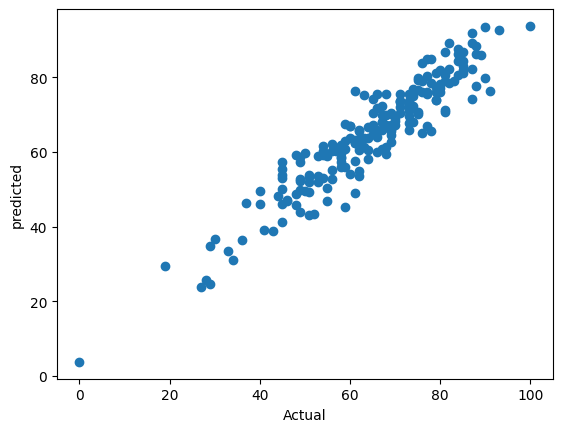

In [27]:
plt.scatter(y_test ,y_pred);
plt.xlabel('Actual');
plt.ylabel('predicted');

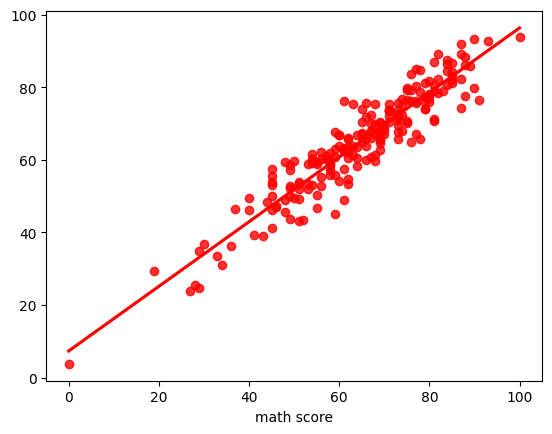

In [28]:
sns.regplot(x= y_test,y= y_pred ,ci=None , color='red');

In [29]:
pred_df = pd.DataFrame({'Actual Value' : y_test , 'Predicted value': y_pred, 'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287


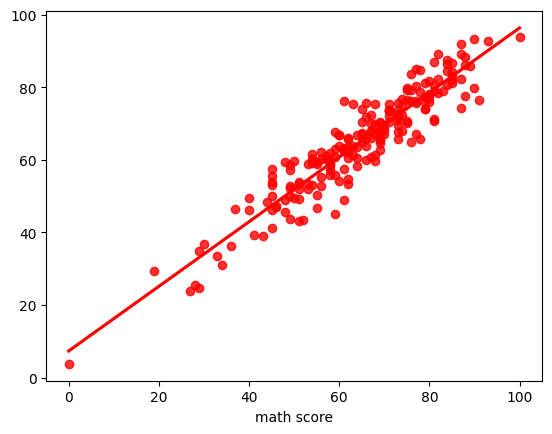

In [30]:
sns.regplot(x= y_test, y= y_pred , ci=None ,color='red');